#### Instructions

##### Follow the instructions given in comments prefixed with ## and write your code below that.

##### Also fill the partial code in given blanks.

##### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [51]:
faculty = cv2.imread("plaksha_Faculty.jpg")

## Convert the image to grayscale
grayscale = cv2.cvtColor(faculty, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# Applying the face detection method on the grayscale image.
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(
    grayscale, 1.05, 4, minSize=(25, 25), maxSize=(50, 50)
)

# Define the text and font parameters
text = "Face"  ## The text you want to write
font = cv2.FONT_HERSHEY_PLAIN  ## Font type
font_scale = 1  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text


# Iterating through rectangles of detected faces
for x, y, w, h in faces_rect:
    cv2.rectangle(faculty, (x, y), (x + w, y + h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(faculty, text, (x, y - 5), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"
cv2.imwrite("outputs/detected_faces.jpg", faculty)


cv2.imshow(f"Total number of face detected are {len(faces_rect)}", faculty)
cv2.waitKey(0)
cv2.destroyAllWindows()

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


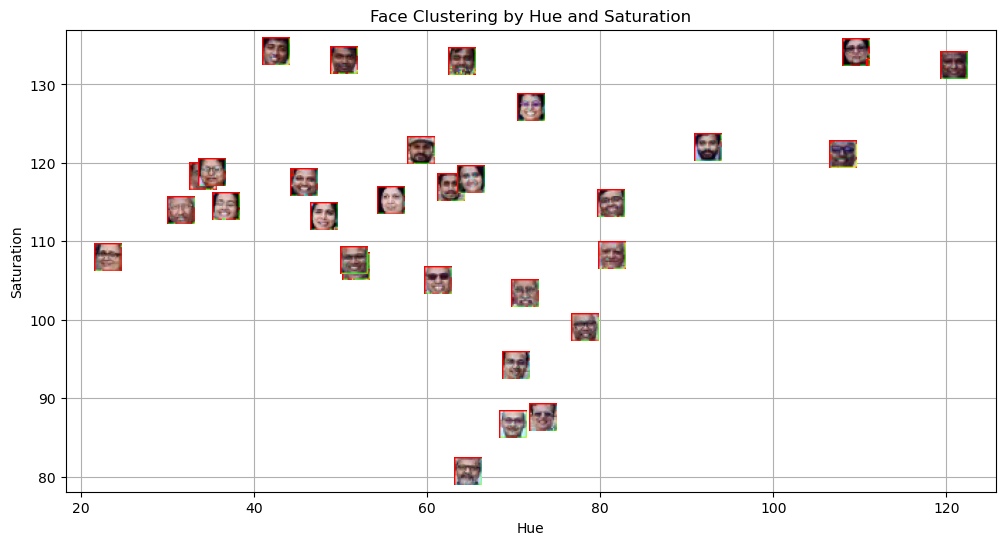

In [52]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(faculty, cv2.COLOR_BGR2HSV)
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_title('Face Clustering by Hue and Saturation')
ax.grid(True)
plt.show()


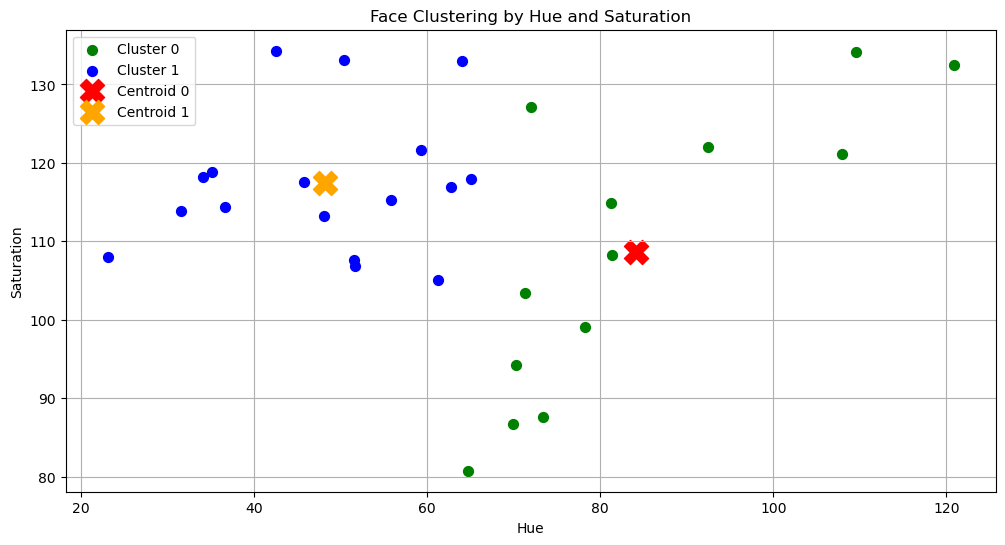

In [53]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0', s=50)

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1', s=50)

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=300, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='orange', marker='X', s=300, label='Centroid 1')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Face Clustering by Hue and Saturation')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 8, minSize=(20, 20), maxSize=(50, 50))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Detected Faces in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

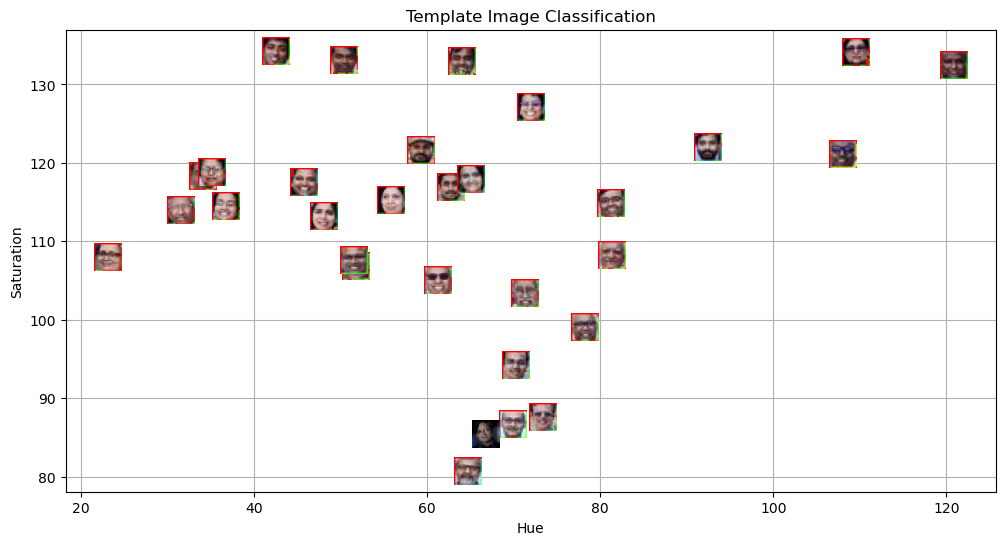

In [55]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
ax.set_xlabel('Hue')
## Put y label
ax.set_ylabel('Saturation')
## Put title
ax.set_title('Template Image Classification')
## Add grid
ax.grid(True)
## show plot
plt.show()

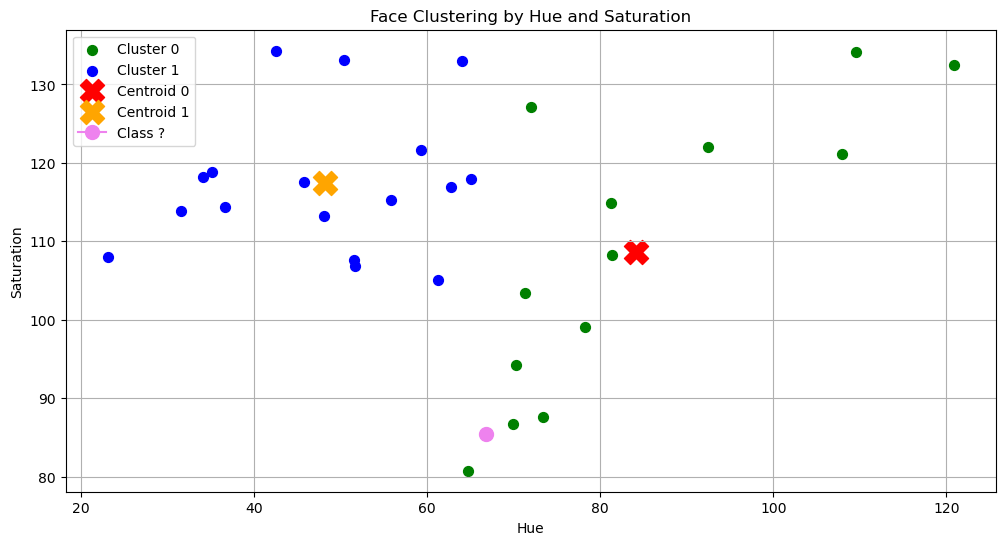

In [56]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0', s=50)

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1', s=50)

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=300, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='orange', marker='X', s=300, label='Centroid 1')
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

# Put x label
plt.xlabel('Hue')
# Put y label
plt.ylabel('Saturation')
# Put title
plt.title('Face Clustering by Hue and Saturation')
# Add a legend
plt.legend()
# Add grid
plt.grid(True)
# show the plot
plt.show()

## End of the lab 5 ##

## Report:

## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms?

The most common distance metrics are:

- **Euclidean Distance**
- **Manhattan Distance**
- **Chebyshev Distance**
- **Minkowski Distance**
- **Hamming Distance**
- **Cosine Similarity Distance**

#### 2. What are some real-world applications of distance-based classification algorithms?

- Image recognition and facial recognition
- Medical diagnosis and disease prediction
- Recommendation systems for movies, products, and music
- Spam email detection
- Customer segmentation and clustering
- Handwriting and character recognition
- Credit scoring and fraud detection

#### 3. Explain various distance metrics.

1. Euclidean Distance 

This is the regular “straight-line” distance between two points. It’s the most commonly used distance measure (for example in K-means and DBSCAN).

but
It does not consider how the data is distributed.

In very high dimensions, it becomes less useful because most points end up being almost equally far from each other (this is called the curse of dimensionality).

2. Mahalanobis Distance

This measures how far a point is from a distribution.

Unlike Euclidean distance:

It accounts for variance .

It accounts for correlation between features.

It is not dependent on scale.

If the covariance matrix is just the identity matrix (, Mahalanobis distance becomes the same as Euclidean distance.

It is especially useful for:

Detecting outliers

Multivariate anomaly detection

3. Manhattan Distance (L1 Norm)

Also called Taxicab or City Block distance (or Chandigarh distance).

Instead of measuring straight-line distance, it adds up the absolute differences along each coordinate.

It often works better than Euclidean distance in:

High-dimensional sparse data

Grid-like environments

Common uses:

Integrated circuit design (wire length)

Grid-based movement problems

4. Chebyshev Distance 

Also called Chessboard distance.

It measures the largest difference along any single coordinate.

It models situations where:

Movement in any direction costs the same

Only the biggest coordinate difference matters

Examples:

Chess king movement

Warehouse crane systems


5. Minkowski Distance

This is a general formula that includes several distance measures depending on a parameter 
p
p:

p=1
p=1 → Manhattan distance

p=2
p=2 → Euclidean distance

p→∞
p→∞ → Chebyshev distance

So it’s a flexible distance function

6. Cosine Distance

This measures the angle between two vectors, not how long they are.

It is computed as:

1−Cosine Similarity
1−Cosine Similarity

It’s useful when:

Direction matters more than magnitude

Comparing documents (word frequency vectors)

Recommender systems

High-dimensional text data

For example, two documents can be very different lengths but still have similar content — cosine distance captures that.

7. Hamming Distance

Used for:

Categorical data

Strings

Binary vectors

It counts how many positions are different between two sequences.

#### 4. What is the role of cross validation in model performance?

Cross-validation:

- Evaluates model performance on different data subsets
- Reduces overfitting by testing on unseen data
- Provides reliable estimates of generalization error
- Uses all data for both training and testing
- Helps select optimal hyperparameters and model complexity

#### 5. Explain variance and bias in terms of KNN?

In KNN, bias and variance are controlled by the choice of k. If k is very small, the model relies on very few nearby points and ends up fitting the training data very closely. This leads to low bias because it can model detailed patterns, but high variance since slight changes in the dataset can significantly affect the predictions. It can also end up fitting random noise. On the other hand, if k is large, the model considers many neighbors and smooths out predictions by averaging them. This makes the model more stable and lowers variance, but it increases bias because the model becomes too simple and may fail to capture important structure in the data. Choosing the right k means finding a balance between these two effects.
